In [50]:
# import packages
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import time

import os

# read the dataset into python
df = pd.read_csv('/Users/hakim/Dropbox/Python models/LSTM-Neural-Network-for-Time-Series-Prediction-master/data/FSW_25C.csv')
df.head()

,Strain,Stress
0,0.000000,1.908571
1,0.000000,2.635961
2,0.000031,3.324195
3,0.000000,4.126210
4,0.000000,4.664275


In [69]:
import statsmodels.tsa.stattools

ImportError: cannot import name 'float_factorial' from 'scipy._lib._util' (/Users/hakim/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/scipy/_lib/_util.py)

In [64]:
import pandas as pd
import numpy as np
import math
import pickle
from scipy.stats import kruskal, pearsonr, randint, uniform, chi2_contingency, boxcox
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler, power_transform
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate, TimeSeriesSplit, RandomizedSearchCV, GridSearchCV, cross_val_predict
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss, acf, pacf
from collections import defaultdict, OrderedDict
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.decomposition import PCA
from statsmodels.tsa.ar_model import AR
from skits.feature_extraction import AutoregressiveTransformer
from skits.preprocessing import ReversibleImputer
from sklearn.linear_model import LinearRegression
import xgboost as xgb

import seaborn as sb
import matplotlib.pyplot as plt 

%matplotlib inline

ImportError: cannot import name 'float_factorial' from 'scipy._lib._util' (/Users/hakim/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/scipy/_lib/_util.py)

In [52]:
df.tail()

,Strain,Stress
1516,0.080658,297.084416
1517,0.080744,296.378331
1518,0.080917,295.525762
1519,0.081004,294.517843
1520,0.081205,293.212427


In [53]:
df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Strain  1521 non-null   float64
 1   Stress  1521 non-null   float64
dtypes: float64(2)
memory usage: 23.9 KB


,Strain,Stress
0,0.000000,1.908571
1,0.000000,2.635961
2,0.000031,3.324195
3,0.000000,4.126210
4,0.000000,4.664275
5,0.000000,5.508944
6,0.000125,6.489883
7,0.000094,7.030624
8,0.000094,7.320000
9,0.000094,7.490036


In [54]:
X = df.iloc[:,:-1].values      
Y = df.iloc[:,1].values

In [55]:
print(X)

[[0.0000000e+00]
 [0.0000000e+00]
 [3.1200000e-05]
 ...
 [8.0917325e-02]
 [8.1003784e-02]
 [8.1205493e-02]]


In [56]:
print(Y)

[  1.90857143   2.63596138   3.3241946  ... 295.5257615  294.5178431
 293.2124266 ]


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 2)

In [59]:
df.describe()

,Strain,Stress
count,1521.000000,1521.000000
mean,0.022869,212.318987
std,0.024803,100.265221
min,0.000000,1.908571
25%,0.002029,120.698097
50%,0.011280,245.618604
75%,0.041262,305.593487
max,0.081205,320.945654


In [60]:
df.dtypes

Strain    float64
Stress    float64
dtype: object

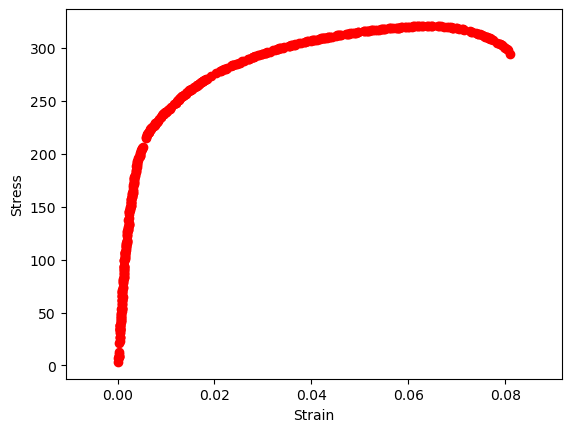

In [74]:
   # plot the series
plt.scatter(X_test, Y_test, color = 'red')
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.grid(False)

plt.show()

In [71]:
print("Shape of training set: {}".format(X_train.shape))
print("Shape of test set: {}".format(X_test.shape))

Shape of training set: (1064, 1)
Shape of test set: (457, 1)


In [72]:
print("Shape of training set: {}".format(Y_train.shape))
print("Shape of test set: {}".format(Y_test.shape))

Shape of training set: (1064,)
Shape of test set: (457,)


In [76]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model = Sequential()
model.add(LSTM(64, dropout=0.0, recurrent_dropout=0.0,\
                   input_shape=(None, 1)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
print('Train...')

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Build model...
Train...


ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (1064, 1)